What is the name of the file?images.zip
Which word?Mark
Results found in file a-0.png


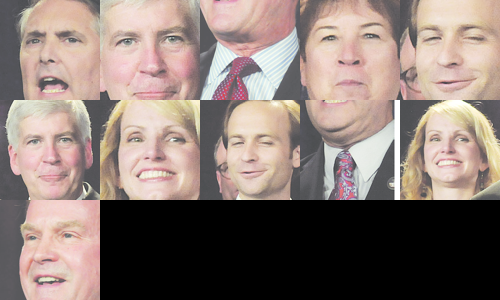

Results found in file a-1.png


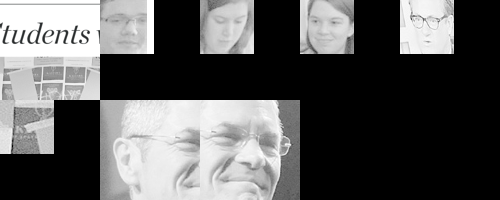

Results found in file a-10.png


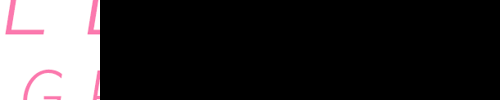

Results found in file a-13.png


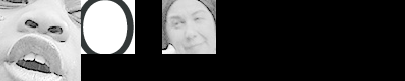

Results found in file a-2.png


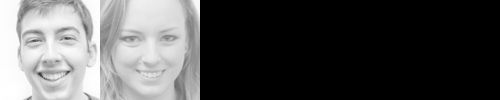

Results found in file a-3.png


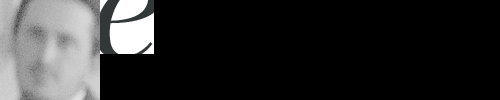

Results found in file a-8.png


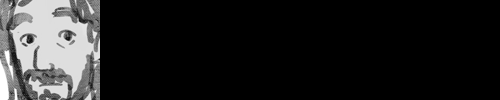

In [5]:
import math
import zipfile
from operator import index

import PIL
import numpy
from IPython.display import display
from PIL import Image
import pytesseract
import numpy as np
from PIL.ImageShow import show
import cv2 as cv
from PIL import ImageDraw

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
fname = input('What is the name of the file?')
kw = input('Which word?') # receive the key word

def get_file_names():
    # read image file from the zipfile
    name_list = []
    with zipfile.ZipFile(fname) as myzip:
        for fil in myzip.infolist():
            name_list.append(fil.filename)
        return name_list

def read_from_zip():
    # read image file from the zipfile
    image_list = []
    with zipfile.ZipFile(fname) as myzip:
        for fil in myzip.infolist():
            ifil = myzip.open(fil)
            im = Image.open(ifil)
            # get a list of Image files, ready for processing in face2thumb and
            # extract_text
            image_list.append(im)
        return image_list

def face2thumb(image_list):
    # this fuction receive a list of images and turn them into thumbnails as Image object
    thumb_size = (100, 100)  # size of the resize(thumbnail)
    pic_num = 1
    face_ims_list = []
    for pic in image_list:
        pic.save('for_face_recog{}.jpg'.format(pic_num)) # save the pics for cv
        fcv = cv.imread('for_face_recog{}.jpg'.format(pic_num))#read the stored pics
        pic_num += 1
        # And we'll convert it to gray using the cvtColor image
        gray = cv.cvtColor(fcv, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.5)
        if len(faces) == 0:
            pass
        else:
            recs = faces.tolist()
        # Now, crop the faces and get a list of Image object
            face_ims = []
            for rec in recs:
                face_im = pic.crop((rec[0], rec[1], rec[0] + rec[2], rec[1] + rec[3]))
                face_im.thumbnail(thumb_size)
                face_ims.append(face_im)
        face_ims_list.append(face_ims)
    return face_ims_list

def ctc_st(face_im):
    # according to the reference, I should set the number of pictures in one row to be five
        row_num = math.ceil(len(face_im)/5) # round up
        first_image = face_im[0]
        contact_sheet = PIL.Image.new(first_image.mode, (first_image.width*5,first_image.height*row_num))
        x = 0
        y = 0

# Now, lets iterate over our images.
        for face_img in face_im:
        #Lets paste the current image into the contact sheet
            contact_sheet.paste(face_img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
            if x+first_image.width == contact_sheet.width:
                x = 0
                y = y+first_image.height
            else:
                x = x+first_image.width
# Now lets display that composite image
        display(contact_sheet)


def extract_text(image_list):
    # the parameter is a list from read_from_zip
    # each element in the return value is the text of each pic
    text_from_pic = []
    for img2txt in image_list:
        img_text = pytesseract.image_to_string(img2txt)
        text_from_pic.append(img_text)
    return text_from_pic

name_lst = get_file_names()
faces = face2thumb(read_from_zip())
texts = extract_text(read_from_zip())

for text in texts:
    if kw in text:
        print("Results found in file {}".format(name_lst[texts.index(text)]))
        if faces[texts.index(text)]:
                ctc_st(faces[texts.index(text)]) 
        else:
            print("But there were no faces in that file")